# Chi-Squared to select features

## Import necessary tools

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2

A common problem in applied machine learning is determining whether input features are relevant to the outcome to be predicted.

This is the problem of feature selection.

In the case of *classification* problems where *input* variables are *also categorical*, we can use statistical tests to determine whether the output variable is dependent or independent of the input variables. If independent, then the input variable is a candidate for a feature that may be irrelevant to the problem and removed from the dataset.

The Pearson’s chi-squared statistical hypothesis is an example of a test for independence between categorical variables.

In this tutorial, you will discover the chi-squared statistical hypothesis test for quantifying the independence of pairs of categorical variables.

After completing this tutorial, you will know:

- Pairs of categorical variables can be summarized using a contingency table.
- The chi-squared test can compare an observed contingency table to an expected table and determine if the categorical variables are independent.
- How to calculate and interpret the chi-squared test for categorical variables in Python.

Let’s get started.
1. Contingency Table
2. Pearson’s Chi-Squared Test
3. Example Chi-Squared Test

# Contingency Table

A categorical variable is a variable that may take on one of a set of labels.

An example might be sex, which may be summarized as male or female. The variable is ‘sex‘ and the labels or factors of the variable are ‘male‘ and ‘female‘ in this case.

We may wish to look at a summary of a categorical variable as it pertains to another categorical variable. For example, sex and interest, where interest may have the labels ‘science‘, ‘math‘, or ‘art‘. We can collect observations from people collected with regard to these two categorical variables; for example:
```
Sex,	Interest
Male,	Art
Female,	Math
Male, 	Science
Male,	Math
...
```
We can summarize the collected observations in a table with one variable corresponding to columns and another variable corresponding to rows. Each cell in the table corresponds to the count or frequency of observations that correspond to the row and column categories.

Historically, a table summarization of two categorical variables in this form is called a contingency table.

For example, the Sex=rows and Interest=columns table with contrived counts might look as follows:
```
        Science,	Math,	Art
Male         20,      30,    15
Female       20,      15,    30
```

# Create contingency table
First, we have to create a contingency table.

In [2]:
n = 130  # Number of samples.
d = 1  # Dimensionality. (sex)
c = 2  # Number of categories. (science, math, art)

sex_series = np.random.choice(['Male', 'Female'], size=(n,d))
interest_series = np.random.choice(['Art', 'Math', 'Science'], size=(n,d))

d = {'sex': sex_series, 'interests': interest_series}

data1 = pd.DataFrame.from_dict(list(d['sex']))
data2 = pd.DataFrame.from_dict(list(d['interests']))
data = pd.concat([data1, data2], axis=1)
data.columns = ['sex', 'interests']
data.head()

,sex,interests
0,Female,Art
1,Male,Math
2,Male,Art
3,Female,Art
4,Male,Math


In [3]:
data.sex.value_counts()

Male      68
Female    62
Name: sex, dtype: int64

In [4]:
data.interests.value_counts()

Science    46
Math       46
Art        38
Name: interests, dtype: int64

Now we are ready to create the contingency table.
Use pd.crosstab(index, column) to convert the dataframe. The parameters are:

- index : array-like, Series, or list of arrays/Series
    - Values to group by in the rows.

- columns : array-like, Series, or list of arrays/Series
    - Values to group by in the columns.

In [5]:
# Contingency table.
contingency = pd.crosstab(data['sex'], data['interests'])
contingency

interests,Art,Math,Science
sex,,,
Female,19,22,21
Male,19,24,25


The table was called a contingency table, by Karl Pearson, because the intent is to help determine whether one variable is contingent upon or depends upon the other variable. For example, does an interest in math or science depend on gender, or are they independent?

This is challenging to determine from the table alone; instead, we can use a statistical method called the Pearson’s Chi-Squared test.

# Pearson’s Chi-Squared Test
The Pearson’s Chi-Squared test, or just Chi-Squared test for short, is named for Karl Pearson, although there are variations on the test.

The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the *observed* frequencies for a categorical variable match the *expected* frequencies for the categorical variable. The test calculates a statistic that has a chi-squared distribution, named for the Greek capital letter Chi (X) pronounced “ki” as in kite.

Given the Sex/Interest example above, the number of observations for a category (such as male and female) may or may not be the same. Nevertheless, we can calculate the expected frequency of observations in each Interest group and see whether the partitioning of interests by Sex results in similar or different frequencies.

The Chi-Squared test does this for a contingency table, first calculating the expected frequencies for the groups, then determining whether the division of the groups, called the observed frequencies, matches the expected frequencies.

The result of the test is a test statistic that has a chi-squared distribution and can be interpreted to reject or fail to reject the assumption or null hypothesis that the observed and expected frequencies are the same.
```
When observed frequency is far from the expected frequency, the corresponding term in the sum is large; when the two are close, this term is small. Large values of X^2 indicate that observed and expected frequencies are far apart. Small values of X^2 mean the opposite: observeds are close to expecteds. So X^2 does give a measure of the distance between observed and expected frequencies.

— Page 525, Statistics, Fourth Edition, 2007.
```
The variables are considered independent if the observed and expected frequencies are similar, that the levels of the variables do not interact, are not dependent.
```
The chi-square test of independence works by comparing the categorically coded data that you have collected (known as the observed frequencies) with the frequencies that you would expect to get in each cell of a table by chance alone (known as the expected frequencies).

— Page 162, Statistics in Plain English, Third Edition, 2010.
```
We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

- *If Statistic >= Critical Value:* significant result, reject null hypothesis (H0), dependent.
- *If Statistic < Critical Value:* not significant result, fail to reject null hypothesis (H0), independent.

The degrees of freedom for the chi-squared distribution is calculated based on the size of the contingency table as:
```
degrees of freedom: (rows - 1) * (cols - 1)
```
In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

- *If p-value <= alpha:* significant result, reject null hypothesis (H0), dependent.
- *If p-value > alpha:* not significant result, fail to reject null hypothesis (H0), independent.

For the test to be effective, at least five observations are required in each cell of the contingency table.

Next, let’s look at how we can calculate the chi-squared test.

# Example Chi-Squared Test
The Pearson’s chi-squared test for independence can be calculated in Python using the chi2_contingency() SciPy function.

The function takes an array as input representing the contingency table for the two categorical variables. It returns the calculated statistic and p-value for interpretation as well as the calculated degrees of freedom and table of expected frequencies.

In [6]:
type(contingency)

pandas.core.frame.DataFrame

In [7]:
# Chi-square test of independence.
stat, p, dof, expected = chi2_contingency(contingency)

In [8]:
print('stat:', stat)
print('p:', p)
print('dof:', dof)
print('expected:', expected)

stat: 0.15819651843907281
p: 0.9239491334638888
dof: 2
expected: [[18.12307692 21.93846154 21.93846154]
 [19.87692308 24.06153846 24.06153846]]


We can interpret the statistic by retrieving the critical value from the chi-squared distribution for the probability and number of degrees of freedom.

For example, a probability of 95% can be used, suggesting that the finding of the test is quite likely given the assumption of the test that the variable is independent. If the statistic is less than or equal to the critical value, we can fail to reject this assumption, otherwise it can be rejected.

In [9]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


We can also interpret the p-value by comparing it to a chosen significance level, which would be 5%, calculated by inverting the 95% probability used in the critical value interpretation.

In [10]:
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [11]:
print('original contingency table:')
print(contingency)
print()

print('degrees of freedom (dof) = %d' % dof)
print()
print('calculated expected frequency table:')
print(expected)
print()

# interpret test-statistic
print('INTERPRET TEST-STATISTIC (prob = 0.95):')
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
print('so compare absolute value of stat, %.3f, and critical, %.3f:' % (stat, critical))
print()
if abs(stat) >= critical:
    print('abs(stat) >= critical')
    print('%.3f >= %.3f' % (abs(stat), critical))
    print('Dependent (reject H0)')
else:
    print('abs(stat) < critical')
    print('%.3f < %.3f' % (abs(stat), critical))          
    print('Independent (fail to reject H0)')
print()
print('INTERPRET P-VALUE (alpha = 1 - prob = .05):')
# interpret p-value
alpha = 1.0 - prob
print('p=%.3f, significance=%.3f' % (p, alpha))
print('so compare p, %.3f, with alpha, %.3f:' % (p, alpha))
print()
if p <= alpha:
    print('p <= alpha')
    print('%.3f <= %.3f' % (p, alpha))
    print('Dependent (reject H0)')
else:
    print('p > alpha')
    print('%.3f > %.3f' % (p, alpha))
    print('Independent (fail to reject H0)')

original contingency table:
interests  Art  Math  Science
sex                          
Female      19    22       21
Male        19    24       25

degrees of freedom (dof) = 2

calculated expected frequency table:
[[18.12307692 21.93846154 21.93846154]
 [19.87692308 24.06153846 24.06153846]]

INTERPRET TEST-STATISTIC (prob = 0.95):
probability=0.950, critical=5.991, stat=0.158
so compare absolute value of stat, 0.158, and critical, 5.991:

abs(stat) < critical
0.158 < 5.991
Independent (fail to reject H0)

INTERPRET P-VALUE (alpha = 1 - prob = .05):
p=0.924, significance=0.050
so compare p, 0.924, with alpha, 0.050:

p > alpha
0.924 > 0.050
Independent (fail to reject H0)


# Example 2:
We can tie all of this together and demonstrate the chi-squared significance test using a contrived contingency table.

A contingency table is defined below that has a different number of observations for each population (row), but a similar proportion across each group (column). Given the similar proportions, we would expect the test to find that the groups are similar and that the variables are independent (fail to reject the null hypothesis, or H0).

In [12]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [  [10, 20, 30],
           [6,  9,  17]]
print('TABLE USED FOR DATA:')
print(table)
print()

stat, p, dof, expected = chi2_contingency(table)
print('degrees of freedom (dof) =%d' % dof)
print()
print('calculated expected frequency table = ')
print(expected)
print()

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print()

# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

TABLE USED FOR DATA:
[[10, 20, 30], [6, 9, 17]]

degrees of freedom (dof) =2

calculated expected frequency table = 
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]

probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)

significance=0.050, p=0.873
Independent (fail to reject H0)


Running the example first prints the contingency table. The test is calculated and the degrees of freedom (dof) is reported as 2, which makes sense given:
```
degrees of freedom: (rows - 1) * (cols - 1)
degrees of freedom: (2 - 1) * (3 - 1)
degrees of freedom: 1 * 2
degrees of freedom: 2
```
Next, the calculated expected frequency table is printed and we can see that indeed the observed contingency table does appear to match via an eyeball check of the numbers.

The critical value is calculated and interpreted, finding that indeed the variables are independent (fail to reject H0). The interpretation of the p-value makes the same finding.
```
[[10, 20, 30], [6, 9, 17]]
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)
significance=0.050, p=0.873
Independent (fail to reject H0)
```

Tutorial used: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

# Feature Engineering Using Chi-Squared

Chi-Squared can also be used for feature engineering. This example is from Codeup's curriculum.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

import wrangle

# acquire data and remove null values 
df = wrangle.wrangle_grades()

# split into train and test
train, test = wrangle.split_my_data(df)

# scale data using standard scaler
scaler, train, test = wrangle.standard_scaler(train, test)

# to return to original values
# scaler, train, test = scaling.my_inv_transform(scaler, train, test)

X_train = train.drop(columns='final_grade')
y_train = train[['final_grade']]
X_test = test.drop(columns='final_grade')
y_test = test[['final_grade']]

## Filter Methods
- Goals: You want to keep the attributes with highest correlation to the target variable and of those features, if two are highly correlated with each other, remove one of them.
- Filter and take only the subset of the relevant features.
- The model is built after selecting the features.

## Correlation Thresholds
- The filtering can be done using correlation matrix with Pearson correlation.
- For example, if you had a real-estate dataset with 'Floor Area (Sq. Ft.)' and 'Floor Area (Sq. Meters)' as separate features, you can safely remove one of them. Which one should you remove? Well, you'd first calculate all pair-wise correlations. Then, if the correlation between a pair of features is above a given threshold, you'd remove the one that has larger mean absolute correlation with other features.

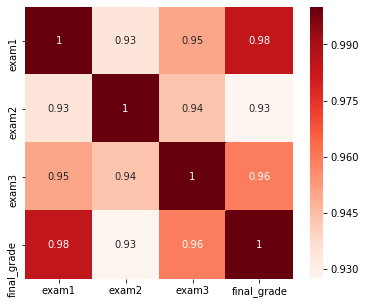

In [14]:
#Using Pearson Correlation
plt.figure(figsize=(6,5))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

To view just the correlations of each attribute with the target variable, and filter down to only those above a certain value:

In [15]:
#Correlation with output variable
cor_target = abs(cor["final_grade"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

exam1          0.984221
exam2          0.927348
exam3          0.959314
final_grade    1.000000
Name: final_grade, dtype: float64

Looking at the correlation of each of these variables, exam 1 is most correlated with final grade and all three exams are correlated with each other. So using this method, we may decide to only use one exam or we may want to create new features, such as exam2_delta = exam2 - exam1

### Select K Best
- SelectKBest removes all but the highest scoring features
- Scores are the test statistic for the chosen function or test (Chi-squared, F-regression, etc.)
- We will only look at using Chi-Squared in this study.

In [16]:
from sklearn.feature_selection import SelectKBest

### Using Chi-Squared
All values must be positive to use chi-squared in this case. Therefore, we will use the non-scaled values. This is ok since all columns are on the same unit. Otherwise, we could have used a scaling method that keeps all values > 0.

In [18]:
from sklearn.feature_selection import chi2

scaler, train2, test2 = wrangle.my_inv_transform(scaler, train, test)

X_train2 = train2.drop(columns='final_grade')
y_train2 = train2[['final_grade']]

In [19]:
chi_selector = SelectKBest(chi2, k=2)

chi_selector.fit(X_train2,y_train2)

chi_support = chi_selector.get_support()
chi_feature = X_train2.loc[:,chi_support].columns.tolist()
chi_feature
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

2 selected features
['exam1', 'exam2']


## An interesting note, in the Codeup curriculum where they also checked f-regression, wrapper methods including backward elimination using OLS and recursive feature elimination (RFE), embedded methods including LassoCV, and Linear Dimensionality Reduction including principal component analysis (PCA), the prominant recommendations were to keep exam1 and exam3.